## pop2_unibivar

### Imports libraries and load csv

In [1]:
# google drive folder access
# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style="ticks")
sns.set(style="white")
sns.set_palette("GnBu_d")
# import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Table df_joined.csv
path_df = "./datas/pop2_df_base.csv"
df_base = pd.read_csv(path_df, sep=',', error_bad_lines=False, index_col=0)

### Functions

In [2]:
def description_indiv(df, var_name, old_categ, new_categ, fig_w, fig_h, x_label, y_label, angle=45):

  df_base['ID'] = df_base.index
  # répartition
  data = df.groupby([var_name])['ID'].agg(['count'])
  # total individus
  total = data['count'].sum()
  # calcul pourcentages
  data['percent'] = data['count'].apply(lambda x: 100 * x / total)

  # reset index
  data.reset_index(inplace=True)
  data[var_name] = data[var_name].astype(int).astype(str)
  # labels replace
  data[var_name].replace(to_replace=old_categ, value=new_categ, inplace=True)

  # Initialize the matplotlib figure
  f, ax = plt.subplots(figsize=(fig_w, fig_h))
  sns.despine(left=True, offset=5);

  # barplot
  sns.barplot(x=var_name, y="percent", data=data[[var_name,'percent']], orient='v')
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  plt.xticks(rotation=angle)

  # display values on bars
  for index, row in data.iterrows():
    ax.text(row.name,row.percent +1, round(row.percent,2), color='black', ha="center")


def df_base_disp(columns_names, fig_w, fig_h):

  fig_dims = (fig_w, fig_h)
  nb_plots = len(columns_names)
  fig, axs = plt.subplots(ncols=nb_plots, figsize=fig_dims)
  skewValue = 0
  kurtosis = 0

  for i, name in enumerate(columns_names):
    # print(i, name)
    x_data =  df_base[name]
    # skewvalue
    skewValue = x_data.skew()
    # kurtosis
    kurtosis = x_data.kurtosis()
    disp = "Skew: %0.3f - kurtosis: %0.3f" % (skewValue, kurtosis)
    # print(disp)

    # plot
    # ax = sns.kdeplot(x_data, shade=True, ax=axs[i])
    ax = sns.distplot(x_data, ax=axs[i])
    # add text annotation
    ax.set_title(disp)


def df_base_dispersion(column_data):
  x = column_data

  # skewvalue
  skewValue = x.skew()
  disp = "Skew: %0.3f" % skewValue

  # plot
  sns.kdeplot(x, shade=True);
  plt.xlabel(disp)


def boxplot(df, x_categ, y_quantiv, old_categ, new_categ, fig_w, fig_h, x_label, y_label, angle=45):

  # deactivate warning
  pd.set_option('mode.chained_assignment', None)

  #  get data
  data_f = df[[x_categ, y_quantiv]]
  # cast to str
  data_f.loc[:,x_categ] = data_f.loc[:,x_categ].astype(int).astype(str)
  # labels replace
  data_f[x_categ].replace(to_replace=old_categ, value=new_categ, inplace=True)

  # Initialize the matplotlib figure
  sns.set(style="whitegrid")
  sns.set_palette("GnBu_d")
  f, ax = plt.subplots(figsize=(fig_w, fig_h))
  sns.despine(left=True, offset=5);

  # boxplot
  ax = sns.boxplot(x=x_categ, y=y_quantiv, data=data_f)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  plt.xticks(rotation=angle)


def df_relplot(df, x_data, y_data):

  #  get data
  data_f = df_base[[x_data, y_data]]

  # Initialize the matplotlib figure
  # sns.set(style="whitegrid")
  sns.set_palette("GnBu_d")
  
  # plot
  # f, ax = plt.subplots(figsize=(5, 6))
  sns.relplot(x=x_data, y=y_data, data=data_f)
  # sns.despine()

### Verification datas

In [3]:
print('df_base.shape :', df_base.shape)
print("Total missing values = ", df_base.isna().sum().sum())
df_base[['tage_PS', 'diplome_interv', 'revenu', 'imc', 'restaurationrapide_freq', 'collation_freq', 
         'pain_cereales_bio', 'fruits_legumes_bio', 'produits_laitiers_bio', 'viandes_poissons_bio', 
         'consommation_bio', 'tv_duree', 'ordi_duree', 'travail_duree', 'sedentarite_duree', 
         'activite_total_duree', 'activite_domloissport_duree']].describe()

df_base.shape : (2288, 21)
Total missing values =  0


,tage_PS,diplome_interv,revenu,imc,restaurationrapide_freq,collation_freq,pain_cereales_bio,fruits_legumes_bio,produits_laitiers_bio,viandes_poissons_bio,consommation_bio,tv_duree,ordi_duree,travail_duree,sedentarite_duree,activite_total_duree,activite_domloissport_duree
count,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000
mean,7.867133,4.582605,8.533217,25.793700,1.569073,2.624239,0.350962,0.392045,0.695367,0.496066,0.428322,3.213525,1.870503,3.506600,6.349799,10.123324,2.398787
std,0.771601,1.907616,3.575501,4.930130,0.809681,0.975023,0.677961,0.707674,0.928269,0.736328,0.494944,1.760040,1.421218,1.711142,3.216838,3.607025,2.146942
min,7.000000,1.000000,1.000000,15.776830,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142860,0.077308,0.035714,0.142860,0.119044,0.002976
25%,7.000000,3.000000,6.000000,22.320882,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.429770,3.999996,7.644349,1.057664
50%,8.000000,4.000000,9.000000,25.037310,1.184441,2.066871,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.585665,2.429770,6.000000,10.118902,1.773805
75%,8.000000,6.000000,12.000000,28.394135,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.250825,5.000000,8.464276,12.416915,3.053947
max,9.000000,8.000000,13.000000,52.608677,6.000000,5.000000,3.000000,3.000000,3.000000,3.000000,1.000000,9.000000,9.000000,14.271429,16.997459,17.000002,25.830357


In [4]:
df_base.head()

,NOIND,agglo_5cl,sex_PS,tage_PS,diplome_interv,revenu,imc,fume,restaurationrapide_freq,collation_freq,pain_cereales_bio,fruits_legumes_bio,produits_laitiers_bio,viandes_poissons_bio,consommation_bio,tv_duree,ordi_duree,travail_duree,sedentarite_duree,activite_total_duree,activite_domloissport_duree
0,110100101,1,1,7,3.0,12,18.282312,0.0,2.000000,5.000000,1,0,1.0,0,0.0,2.142860,3.571430,2.429770,8.142860,8.614090,0.110119
1,110100701,1,2,8,3.0,11,23.624619,0.0,1.000000,1.000000,1,2,2.0,2,1.0,1.928570,0.357140,4.000000,6.666670,10.569450,3.160715
2,110100801,1,1,8,3.0,11,29.949701,1.0,1.000000,2.066871,0,0,0.0,0,0.0,0.928570,0.142860,2.429770,1.714290,3.015881,1.178572
3,110101201,1,1,8,6.0,11,26.141914,0.0,1.000000,3.000000,0,0,0.0,0,0.0,3.023461,4.031272,5.714286,13.664864,17.000000,3.422618
4,110101401,1,2,9,3.0,6,22.420361,0.0,1.184441,2.000000,1,0,3.0,1,1.0,1.500000,1.585665,2.429770,1.500000,3.882939,2.160719


### Describe

In [5]:
df_base[['imc', 'tv_duree', 'ordi_duree', 'travail_duree', 'sedentarite_duree']].describe()

,imc,tv_duree,ordi_duree,travail_duree,sedentarite_duree
count,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000
mean,25.793700,3.213525,1.870503,3.506600,6.349799
std,4.930130,1.760040,1.421218,1.711142,3.216838
min,15.776830,0.142860,0.077308,0.035714,0.142860
25%,22.320882,2.000000,1.000000,2.429770,3.999996
50%,25.037310,3.000000,1.585665,2.429770,6.000000
75%,28.394135,4.000000,2.250825,5.000000,8.464276
max,52.608677,9.000000,9.000000,14.271429,16.997459


In [6]:
df_base[['activite_total_duree', 'activite_domloissport_duree']].describe()

,activite_total_duree,activite_domloissport_duree
count,2288.000000,2288.000000
mean,10.123324,2.398787
std,3.607025,2.146942
min,0.119044,0.002976
25%,7.644349,1.057664
50%,10.118902,1.773805
75%,12.416915,3.053947
max,17.000002,25.830357


In [7]:
print(df_base[['imc', 'tv_duree', 'ordi_duree', 'travail_duree', 'sedentarite_duree']].describe())

               imc     tv_duree   ordi_duree  travail_duree  sedentarite_duree
count  2288.000000  2288.000000  2288.000000    2288.000000        2288.000000
mean     25.793700     3.213525     1.870503       3.506600           6.349799
std       4.930130     1.760040     1.421218       1.711142           3.216838
min      15.776830     0.142860     0.077308       0.035714           0.142860
25%      22.320882     2.000000     1.000000       2.429770           3.999996
50%      25.037310     3.000000     1.585665       2.429770           6.000000
75%      28.394135     4.000000     2.250825       5.000000           8.464276
max      52.608677     9.000000     9.000000      14.271429          16.997459


In [8]:
print(df_base[['activite_total_duree', 'activite_domloissport_duree']].describe())

       activite_total_duree  activite_domloissport_duree
count           2288.000000                  2288.000000
mean              10.123324                     2.398787
std                3.607025                     2.146942
min                0.119044                     0.002976
25%                7.644349                     1.057664
50%               10.118902                     1.773805
75%               12.416915                     3.053947
max               17.000002                    25.830357


In [9]:
df_base[['pain_cereales_bio', 'fruits_legumes_bio', 'produits_laitiers_bio', 'viandes_poissons_bio']].describe()

,pain_cereales_bio,fruits_legumes_bio,produits_laitiers_bio,viandes_poissons_bio
count,2288.000000,2288.000000,2288.000000,2288.000000
mean,0.350962,0.392045,0.695367,0.496066
std,0.677961,0.707674,0.928269,0.736328
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000


In [10]:
df_base[['restaurationrapide_freq', 'collation_freq']].describe()

,restaurationrapide_freq,collation_freq
count,2288.000000,2288.000000
mean,1.569073,2.624239
std,0.809681,0.975023
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.184441,2.066871
75%,2.000000,3.000000
max,6.000000,5.000000


In [11]:
print(df_base[['pain_cereales_bio', 'fruits_legumes_bio', 'produits_laitiers_bio', 'viandes_poissons_bio']].describe())

       pain_cereales_bio  fruits_legumes_bio  produits_laitiers_bio  viandes_poissons_bio
count        2288.000000         2288.000000            2288.000000           2288.000000
mean            0.350962            0.392045               0.695367              0.496066
std             0.677961            0.707674               0.928269              0.736328
min             0.000000            0.000000               0.000000              0.000000
25%             0.000000            0.000000               0.000000              0.000000
50%             0.000000            0.000000               0.000000              0.000000
75%             1.000000            1.000000               1.000000              1.000000
max             3.000000            3.000000               3.000000              3.000000


In [12]:
print(df_base[['restaurationrapide_freq', 'collation_freq']].describe())

       restaurationrapide_freq  collation_freq
count              2288.000000     2288.000000
mean                  1.569073        2.624239
std                   0.809681        0.975023
min                   1.000000        1.000000
25%                   1.000000        2.000000
50%                   1.184441        2.066871
75%                   2.000000        3.000000
max                   6.000000        5.000000


### Univar

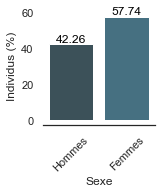

In [13]:
description_indiv(df_base, 'sex_PS', ['1', '2'], ['Hommes', 'Femmes'], 2, 2, 'Sexe', 'Individus (%)', 45)

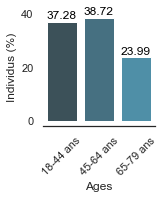

In [14]:
# variable 'tage_PS'
description_indiv(df_base, 'tage_PS', \
                  ['1', '2', '3', '4', '5', '6', '7', '8', '9'], \
                  ['0-11 mois', '1-3 ans', '4-6 ans', '7-10 ans', '11-14 ans', '15-17 ans', '18-44 ans', '45-64 ans', '65-79 ans'], \
                  2, 2, 'Ages', 'Individus (%)', 45)

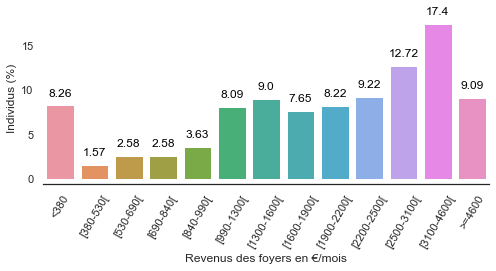

In [15]:
# variable 'revenu'
description_indiv(df_base, 'revenu', \
                  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'], \
                  ['<380', '[380-530[', '[530-690[', '[690-840[', '[840-990[', \
                   '[990-1300[', '[1300-1600[', '[1600-1900[', '[1900-2200[', \
                   '[2200-2500[', '[2500-3100[', '[3100-4600[', '>=4600'], \
                  8, 3, 'Revenus des foyers en €/mois', 'Individus (%)', 60)

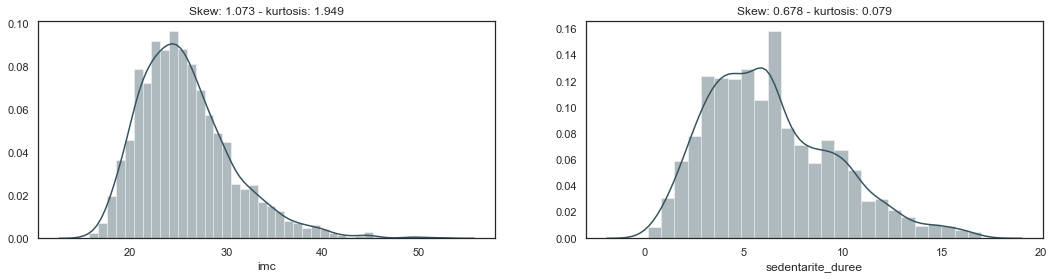

In [16]:
df_base_disp(['imc', 'sedentarite_duree'], 18, 4)

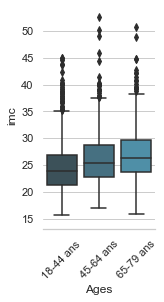

In [17]:
# variables tage_PS & imc
boxplot(df_base, 'tage_PS', 'imc', ['7','8', '9'], ['18-44 ans', '45-64 ans', '65-79 ans'], 2, 4, 'Ages', 'imc', angle=45)

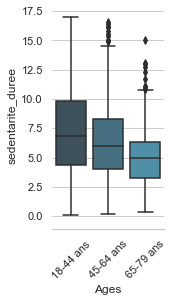

In [18]:
# variables tage_PS & sedentarite_duree
boxplot(df_base, 'tage_PS', 'sedentarite_duree', ['7','8', '9'], ['18-44 ans', '45-64 ans', '65-79 ans'], 2, 4, 'Ages', 'sedentarite_duree', angle=45)

## Bivariée

In [19]:
print(list(df_base))

['NOIND', 'agglo_5cl', 'sex_PS', 'tage_PS', 'diplome_interv', 'revenu', 'imc', 'fume', 'restaurationrapide_freq', 'collation_freq', 'pain_cereales_bio', 'fruits_legumes_bio', 'produits_laitiers_bio', 'viandes_poissons_bio', 'consommation_bio', 'tv_duree', 'ordi_duree', 'travail_duree', 'sedentarite_duree', 'activite_total_duree', 'activite_domloissport_duree', 'ID']


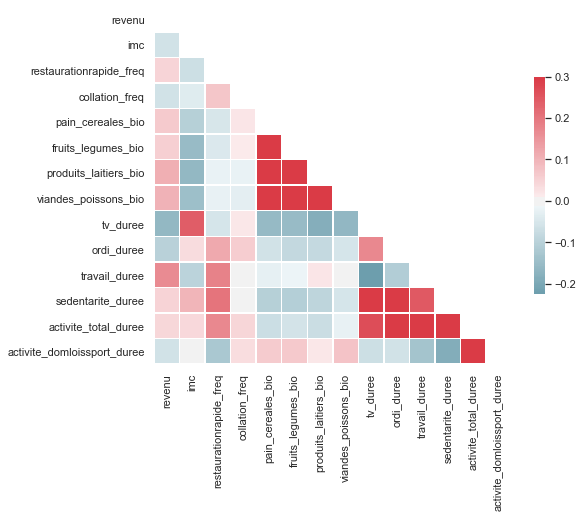

In [62]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# sns.set(style="white")

selected_columns = ['revenu', 'imc', 'restaurationrapide_freq', 'collation_freq', 'pain_cereales_bio', 
                    'fruits_legumes_bio', 'produits_laitiers_bio', 'viandes_poissons_bio', 'tv_duree', 'ordi_duree', 
                    'travail_duree', 'sedentarite_duree', 'activite_total_duree', 'activite_domloissport_duree']

# Generate dataset
d = pd.DataFrame(data=df_base[selected_columns].values, columns=selected_columns)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [79]:
print(corr[['imc', 'revenu', 'restaurationrapide_freq']])

                                  imc    revenu  restaurationrapide_freq
revenu                      -0.058637  1.000000                 0.047892
imc                          1.000000 -0.058637                -0.065057
restaurationrapide_freq     -0.065057  0.047892                 1.000000
collation_freq              -0.034055 -0.059593                 0.072464
pain_cereales_bio           -0.101743  0.063102                -0.049156
fruits_legumes_bio          -0.152221  0.058012                -0.043387
produits_laitiers_bio       -0.160485  0.108378                -0.020814
viandes_poissons_bio        -0.143287  0.104765                -0.022519
tv_duree                     0.241430 -0.160544                -0.053279
ordi_duree                   0.036450 -0.099363                 0.118202
travail_duree               -0.095322  0.168463                 0.180350
sedentarite_duree            0.099624  0.050035                 0.205163
activite_total_duree         0.041518  0.043568    

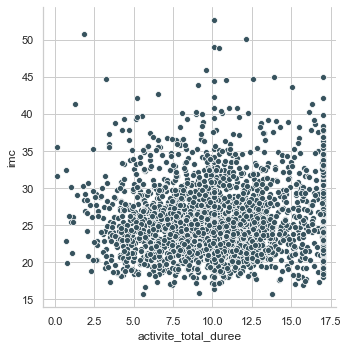

In [51]:
# Relations fruits_legumes & imc
df_relplot(df_base, 'activite_total_duree', 'imc')

In [28]:
# fit = statsmodels.formula.api.ols('val ~ lab', data = df_base).fit()

# mod = smf.ols(formula='agglo_5cl ~ Literacy + Wealth + Region', data=df)